# Mountain Car

In [ ]:
import gym
import numpy as np
# import pandas as pd
import matplotlib as mpl
mpl.use('tkagg')
import matplotlib.pyplot as plt 
import imageio
import os

In [ ]:
%matplotlib widget

In [ ]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")

## Training

In [9]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 100001
SHOW_EVERY = 10000

DISCRETE_OS_SIZE = [30] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# Exploration settings
epsilon = 1  # going to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

# For stats
STATS_EVERY = 1000
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}


q_table = np.random.uniform(low=-1, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

output = "./output/"
for f in os.listdir(output):
    if not f.endswith(".gif"):
        continue
    os.remove(os.path.join(output, f))

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table

# TRAINING (Q-Learning)
for episode in range(EPISODES):
    # set up episode
    episode_reward = 0
    discrete_state, _ = env.reset()
    discrete_state = get_discrete_state(discrete_state)
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
    else:
        render = False
    frames = []

    while not done:

        # epsilon greedy action selection
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)

        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)

        if render:
            frames.append(env.render())

        # If simulation did not end yet after last step - update Q table
        if not done:
            max_future_q = np.max(q_table[new_discrete_state]) # Maximum possible Q value in next step (for new state)
            current_q = q_table[discrete_state + (action,)] # Current Q value (for current state and performed action)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)


        # Simulation ended - update Q directly
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying (as long as episode is in the decaying range)
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

    if episode % SHOW_EVERY == 0:
        imageio.mimsave(f'./output/{episode}.gif', frames, fps=40, loop = 0)


env.close()

Episode:     0, average reward: -0.2, current epsilon: 1.00
Episode:  1000, average reward: -200.0, current epsilon: 0.98
Episode:  2000, average reward: -200.0, current epsilon: 0.96
Episode:  3000, average reward: -200.0, current epsilon: 0.94
Episode:  4000, average reward: -200.0, current epsilon: 0.92
Episode:  5000, average reward: -200.0, current epsilon: 0.90
Episode:  6000, average reward: -200.0, current epsilon: 0.88
Episode:  7000, average reward: -200.0, current epsilon: 0.86
Episode:  8000, average reward: -200.0, current epsilon: 0.84
Episode:  9000, average reward: -200.0, current epsilon: 0.82
Episode: 10000, average reward: -200.0, current epsilon: 0.80
Episode: 11000, average reward: -200.0, current epsilon: 0.78
Episode: 12000, average reward: -200.0, current epsilon: 0.76
Episode: 13000, average reward: -200.0, current epsilon: 0.74
Episode: 14000, average reward: -200.0, current epsilon: 0.72
Episode: 15000, average reward: -200.0, current epsilon: 0.70
Episode: 1

## Auswertung

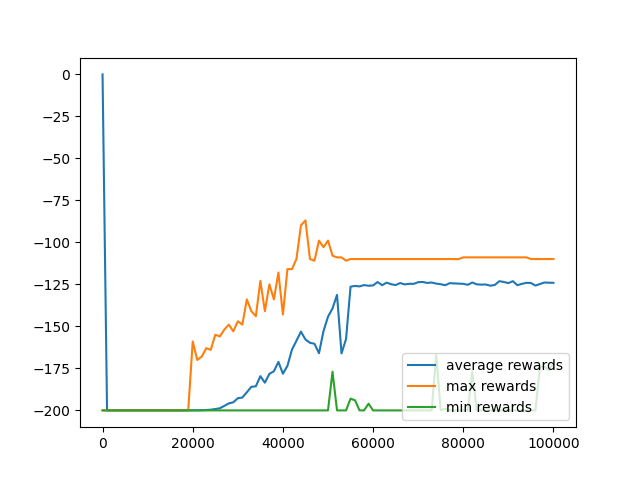

In [10]:
plt.clf()
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()


| Episode 1 | Episode 20k | Episode 50k | Episode 80k | Episode 100k |
|:---------:|:-----------:|:-----------:|:-----------:|:------------:|
|  <img src="./output/0.gif" width="300" height="200" /> | <img src="./output/20000.gif" width="300" height="200" />|<img src="./output/50000.gif" width="300" height="200" />|<img src="./output/80000.gif" width="300" height="200" />|<img src="./output/100000.gif" width="300" height="200" />  |